# Importing libraries

In [48]:
!pip install -q mtcnn

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [54]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
import random
import cv2

from tqdm import tqdm_notebook as tqdm

from PIL import Image
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

from mtcnn.mtcnn import MTCNN

In [55]:
PATH = '/kaggle/input/data-test/data/train/Kim Da-mi/'

ROOT_PATH = '/kaggle/input/data-test/data/'

TRAIN_PATH = '/kaggle/input/data-test/data/train/'

VAL_PATH = '/kaggle/input/data-test/data/val/'

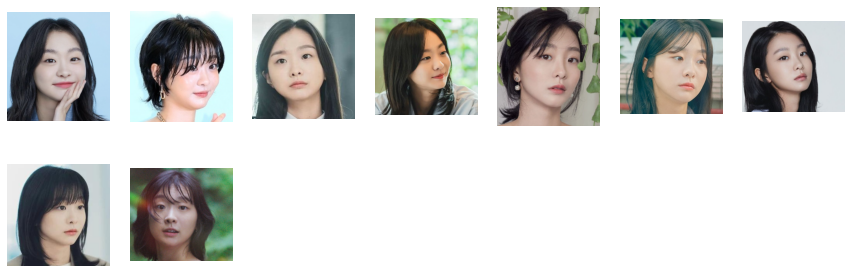

In [56]:
plt.figure(figsize=(15,5))
for i, filename in enumerate(os.listdir(PATH)):
    path = PATH + filename
    image = plt.imread(path)
    
    plt.subplot(2, 7, i+1)
    
    plt.axis('off')
    plt.imshow(image)
    
plt.show()

# Detect faces using MTCNN

In [57]:
#hàm cắt ra khuôn mặt sử dụng MTCNN, nhận đầu vào là một mảng 2 chiều biểu diễn ảnh
def extract_face(image_array, required_size=(160, 160)):
    
    pixels = image_array
    
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    
    x2, y2 = x1 + width, y1 + height
    
    face = pixels[y1:y2, x1:x2]
    
    image = Image.fromarray(face)
    
    image = image.resize(required_size)
    face_array = np.asarray(image)
    
    return face_array

|          | 0/? [00:00<?, ?it/s]

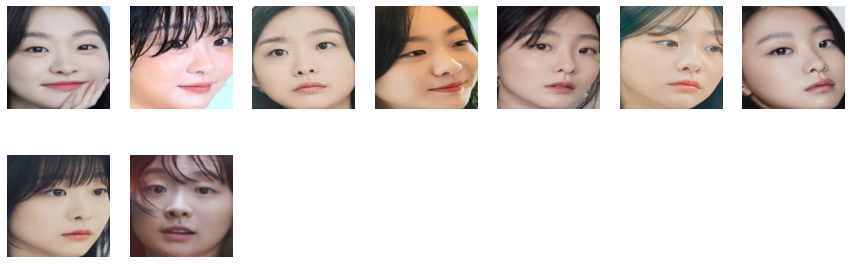

In [58]:
plt.figure(figsize=(15,5))
for i, filename in tqdm(enumerate(os.listdir(PATH))):
    path = PATH + filename
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    face = extract_face(image)
    
    #print(i+1, face.shape)
    
    plt.subplot(2, 7, i+1)
    
    plt.axis('off')
    plt.imshow(face)
    
plt.show()

# Draw a bounding box for each face

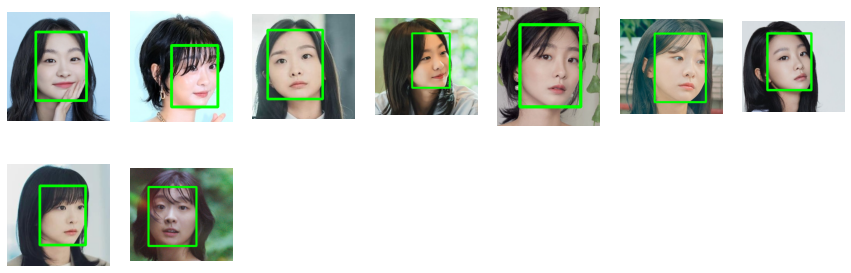

In [59]:
plt.figure(figsize=(15,5))
for i, filename in enumerate(os.listdir(PATH)):
    path = PATH + filename
    image = cv2.imread(path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # detect mặt
    detector = MTCNN()
    detections = detector.detect_faces(image_rgb)

    # vẽ bounding box
    for face in detections:
        x, y, width, height = face['box']
        cv2.rectangle(image_rgb, (x, y), (x + width, y + height), (0, 255, 0), 5)

    plt.subplot(2, 7, i+1)
    plt.axis('off')
    plt.imshow(image_rgb)
plt.show()

In [60]:
def load_faces(directory):
    faces = list()
    for file_name in tqdm(os.listdir(directory)):
        path = directory + file_name
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        face = extract_face(image)
        
        faces.append(face)
    return faces

def load_dataset(directory):
    images, labels = list(), list()
    for folder in tqdm(os.listdir(directory)):
        path = directory + folder + '/'
        
        if not os.path.isdir(path):
            continue
        
        try:
            faces = load_faces(path)
        except Exception:
            print(path)
        print(f'Person : {folder}, Photo : {len(faces)}')

        label = [folder for _ in range(len(faces))]

        images.extend(faces)
        labels.extend(label)
        
    return np.asarray(images), np.asarray(labels)

In [61]:
X_train, y_train = load_dataset(TRAIN_PATH)

X_test, y_test = load_dataset(VAL_PATH)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Person : Ngô Bảo Châu, Photo : 10


  0%|          | 0/10 [00:00<?, ?it/s]

Person : Nguyễn Hoàng Dũng, Photo : 10


  0%|          | 0/11 [00:00<?, ?it/s]

Person : Phùng Thanh Độ, Photo : 11


  0%|          | 0/12 [00:00<?, ?it/s]

Person : Đen Vâu, Photo : 12


  0%|          | 0/9 [00:00<?, ?it/s]

Person : Kim Da-mi, Photo : 9


  0%|          | 0/10 [00:00<?, ?it/s]

Person : Đức Sĩ, Photo : 10


  0%|          | 0/11 [00:00<?, ?it/s]

Person : Faker, Photo : 11


  0%|          | 0/5 [00:00<?, ?it/s]

Person : Đỗ Việt Cường, Photo : 5


  0%|          | 0/11 [00:00<?, ?it/s]

Person : Gumayusi, Photo : 11


  0%|          | 0/11 [00:00<?, ?it/s]

Person : Hoàng Văn Khoa, Photo : 11


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Person : Ngô Bảo Châu, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Nguyễn Hoàng Dũng, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Phùng Thanh Độ, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Đen Vâu, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Kim Da-mi, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Đức Sĩ, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Faker, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Đỗ Việt Cường, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Gumayusi, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Hoàng Văn Khoa, Photo : 1


# Embedding

In [62]:
from keras.models import load_model

#hàm nhúng ảnh thành vector, nhận đầu vào là khuôn mặt lấy được từ ảnh gốc, trả về vector nhúng
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype('float32')
    
    #chuẩn hóa ảnh
    mean, std = face_pixels.mean(), face_pixels.std() 
    face_pixels = (face_pixels - mean) / std
    
    samples = np.expand_dims(face_pixels, axis=0)
    
    yhat = model.predict(samples)
    
    return yhat[0]

In [63]:
face_net_model = load_model('/kaggle/input/kerasfaceneth5/facenet_keras.h5')

In [64]:
trainX = [] #tạo list rỗng, duyệt từng ảnh trong tập X_train, nhúng ảnh xong thêm vào trainX

for pixels in tqdm(X_train):
    embedding = get_embedding(face_net_model, pixels)
    trainX.append(embedding)
trainX = np.asarray(trainX)

print('Train X :', trainX.shape)


testX = [] #tạo list rỗng, duyệt từng ảnh trong tập X_test, nhúng ảnh xong thêm vào testX

for pixels in tqdm(X_test):
    embedding = get_embedding(face_net_model, pixels)
    testX.append(embedding)
testX = np.asarray(testX)

print('test X :', testX.shape)

  0%|          | 0/100 [00:00<?, ?it/s]

Train X : (100, 128)


  0%|          | 0/10 [00:00<?, ?it/s]

test X : (10, 128)


# Predict

In [65]:
label = LabelEncoder()

y_train = [remove_accents(text) for text in y_train]
y_test = [remove_accents(text) for text in y_test]
trainy = label.fit_transform(y_train)
testy = label.fit_transform(y_test)

svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(trainX, trainy)

yhat_train = svc_model.predict(trainX)
yhat_test = svc_model.predict(testX)

score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)

print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=100.000, test=100.000


# Visualize embedded vectors

<AxesSubplot:xlabel='X', ylabel='y'>

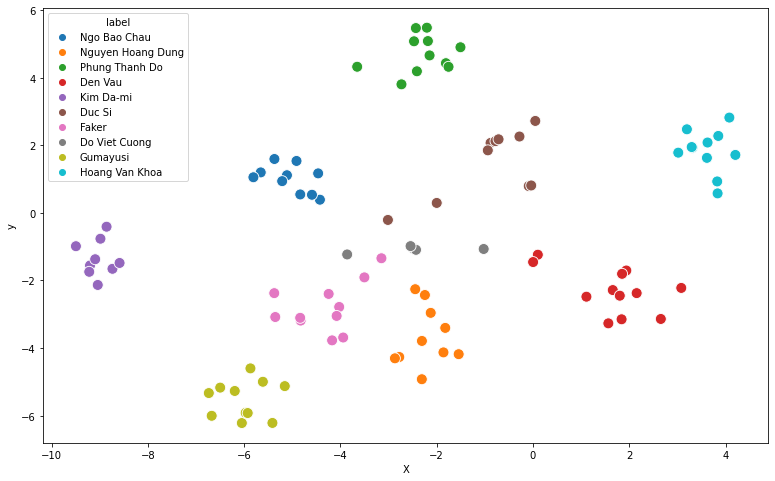

In [306]:
np.random.seed(12)

from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(learning_rate=100)

tsne_features = tsne.fit_transform(trainX)

X = tsne_features[:,0]
y = tsne_features[:,1]

dataset = pd.DataFrame(data=y_train, columns=['label'])
dataset['X'] = X
dataset['y'] = y

plt.figure(figsize=(13,8))
sns.scatterplot(data=dataset, x='X', y='y', hue='label', s=120)

# Predict function

## Predict function

In [66]:
def predict_image(image, clf_model):
    detector = MTCNN()
    detections = detector.detect_faces(image)
    extracted_face = extract_face(image)
    embedded = get_embedding(face_net_model, extracted_face)

    y_pred = clf_model.predict(embedded.reshape(1,-1))
    y_prob = clf_model.predict_proba(embedded.reshape(1, -1))
    class_pred = label.inverse_transform(y_pred)
    
    image_copy = image.copy()
    
    for face in detections:
        x, y, width, height = face['box']
        cv2.rectangle(image_copy, (x, y), (x + width, y + height), (0, 255, 0), 3)
        if np.max(y_prob) * 100 < 20:
            class_pred[0] = 'Unknown'
        cv2.putText(image_copy, f'{class_pred[0]} -{np.max(y_prob) * 100: .2f}%', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    plt.figure(figsize=(20, 20))
    plt.imshow(image_copy)
    plt.axis('off')
    print(y_pred)
    print(class_pred)
    print(y_prob)
    

## Saved image

(-0.5, 719.5, 959.5, -0.5)

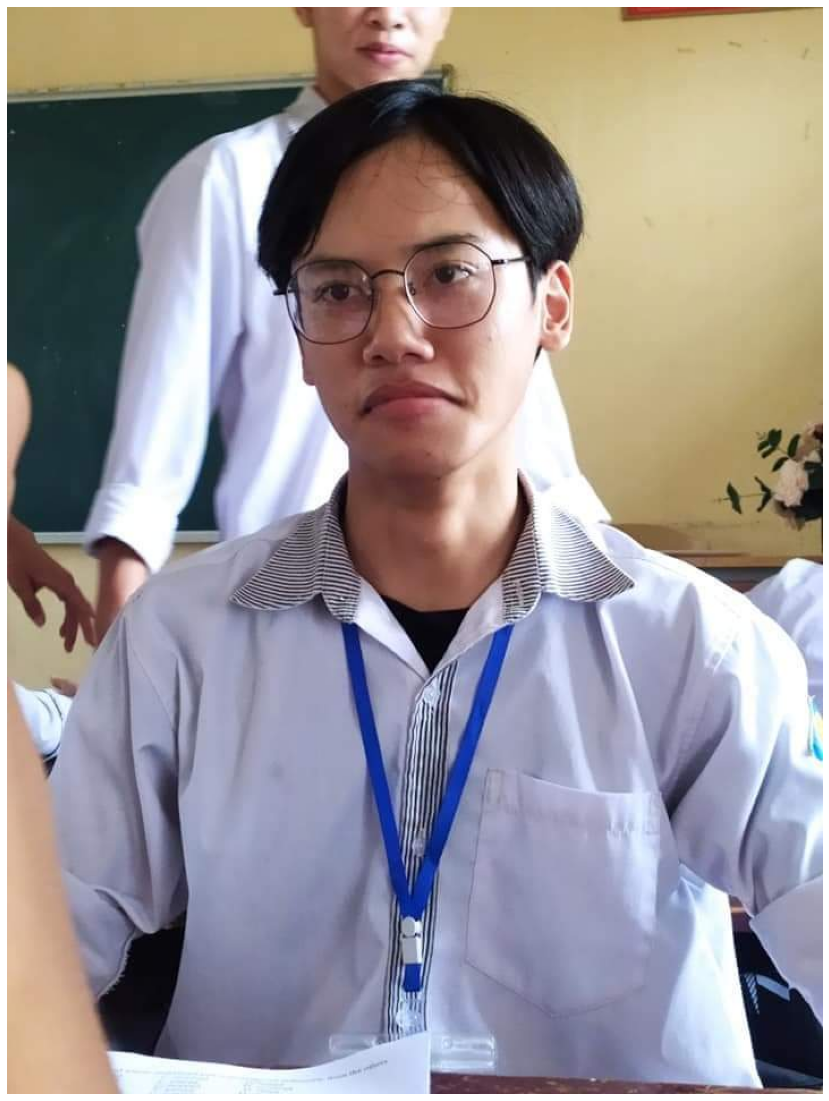

In [67]:
plt.figure(figsize=(20,20))
path = '/kaggle/input/data-test/data/val/Đức Sĩ/z5480893519073_2ad2a434f6d10cf05930ac9ac069f474.jpg'  
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
# plt.savefig('ducsi.png')

[2]
['Duc Si']
[[0.05784116 0.10803842 0.56398123 0.05918311 0.02481766 0.03869224
  0.01492738 0.03841724 0.06401967 0.03008189]]


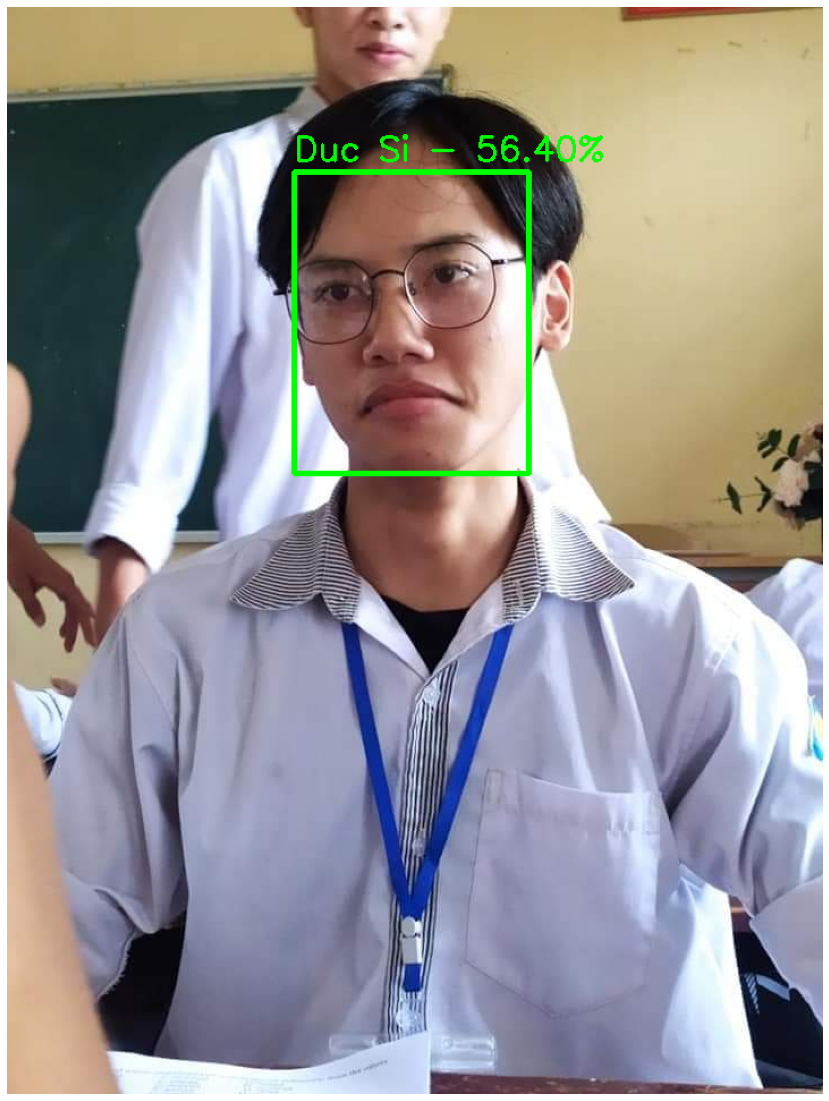

In [68]:
predict_image(image, svc_model)

## Get image by url

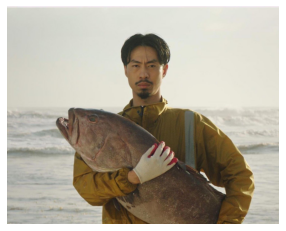

In [69]:
import numpy as np
import requests

url = 'https://thanhnien.mediacdn.vn/Uploaded/duyphuc/2021_12_30/hinh-1-5084.jpg'

# Tải ảnh từ URL
response = requests.get(url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for MTCNN

plt.axis('off')
plt.imshow(image_rgb)

[7]
['Đen Vau']
[[0.03843389 0.01556264 0.02550769 0.01673064 0.02720459 0.01389957
  0.01508446 0.76444714 0.06136117 0.02176821]]


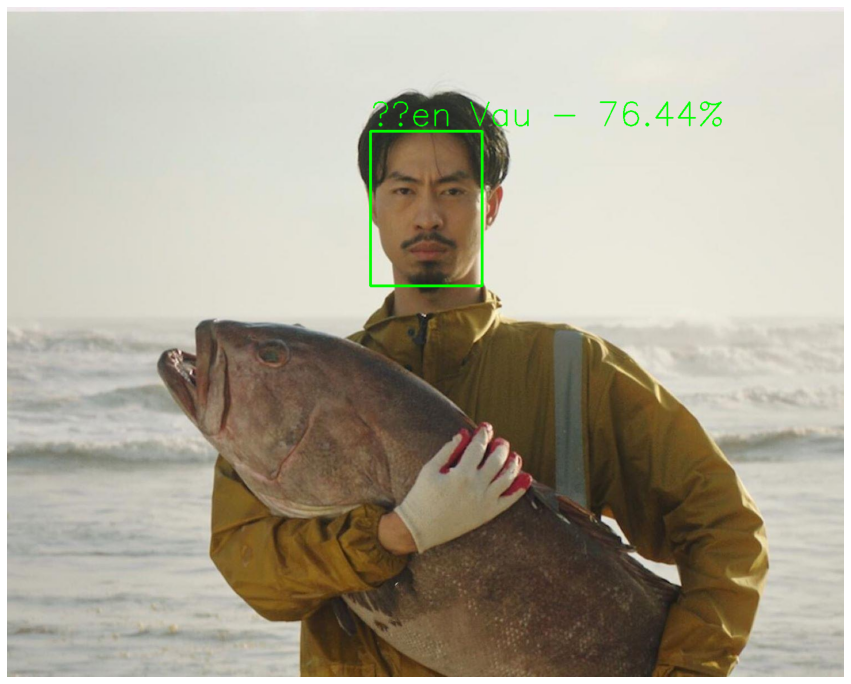

In [292]:
predict_image(image_rgb, svc_model)

# Multi-face recognition

In [70]:
def extract_multi_face(image_array, required_size = (160, 160)):
    pixels = image_array
    
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    
    extracted_list = list()
    
    for face in results:
        # extract the bounding box from the first face
        x1, y1, width, height = face['box']
        
        # bug fix
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height

        face = pixels[y1:y2, x1:x2]
        
        image = Image.fromarray(face)

        image = image.resize(required_size)
        face_array = np.asarray(image)
        extracted_list.append(face_array)
    return extracted_list

In [71]:
def predict_multi_face(image_array, clf_model):
    detector = MTCNN()
    detections = detector.detect_faces(image_array)
    extracted_list = extract_multi_face(image_array)
    probability_list = []  
    predicted_labels = list()
    for face in extracted_list:
        embedded = get_embedding(face_net_model, face)
        y_pred = clf_model.predict(embedded.reshape(1,-1))
        y_prob = clf_model.predict_proba(embedded.reshape(1, -1))
        probability_list.append(np.max(y_prob))
        class_pred = label.inverse_transform(y_pred)
        predicted_labels.append(class_pred)
    
    image_array_copy = image_array.copy()
    
    for i, face in enumerate(detections):
        x, y, width, height = face['box']
        cv2.rectangle(image_array_copy, (x, y), (x + width, y + height), (0, 255, 0), 2)
        predicted_class = predicted_labels[i][0]
        if np.max(y_prob) * 100 < 40:
            predicted_class = 'Unknown'
        cv2.putText(image_array_copy, f'{predicted_class} -{probability_list[i] * 100: .2f}%', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    plt.figure(figsize = (15, 15))
    plt.axis('off')
    plt.imshow(image_array_copy)

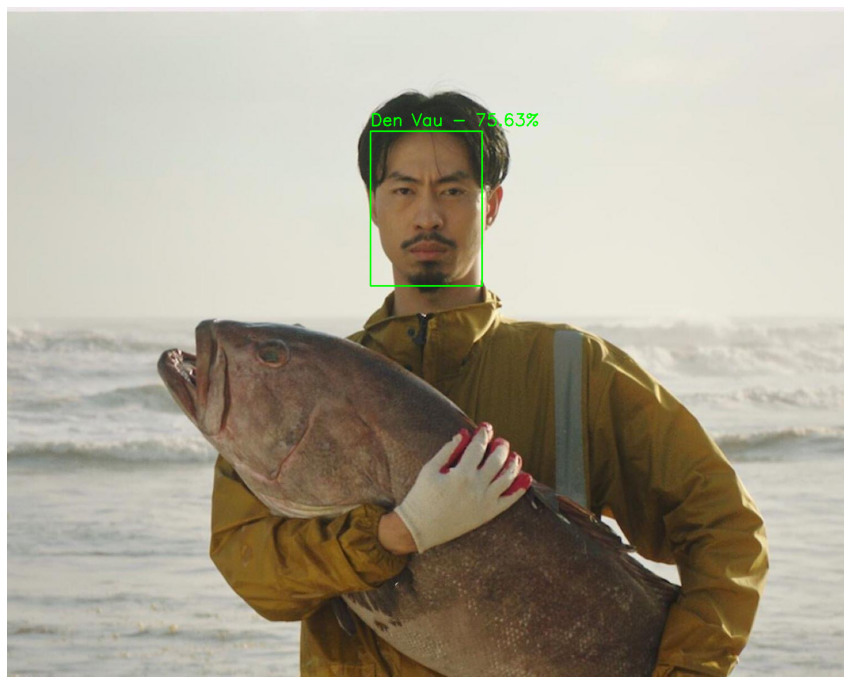

In [73]:
predict_multi_face(image_rgb, svc_model)

# Fine-tuned FaceNet

In [74]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [75]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, InceptionV3

In [76]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Fine tuned using pretrained weights

In [77]:
facenet_pretrained = load_model('/kaggle/input/kerasfaceneth5/facenet_keras.h5')

In [79]:
len(facenet_pretrained.layers)

426

In [82]:
# Lấy đầu ra từ tầng thứ 2 cuối của mô hình
x = facenet_pretrained.layers[-2].output  

# thêm lớp Dense
embedding = Dense(128)(x)  

# thêm lớp chuẩn hóa
output = Lambda(lambda x: tf.math.l2_normalize(x, axis=1))(embedding)  

model = Model(inputs=facenet_pretrained.input, outputs=output)

In [86]:
!pip install tensorflow-addons

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [87]:
import tensorflow_addons as tfa

In [89]:
# đóng băng các tầng của mô hình gốc trừ tầng cần train
for layer in facenet_pretrained.layers[:-2]:  
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tfa.losses.TripletSemiHardLoss())

In [90]:
y_train_labels = encoder.fit_transform(y_train)
y_train_labels

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [94]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [96]:
# Định nghĩa callback để lưu trọng số khi loss nhỏ nhất
checkpoint = ModelCheckpoint(
    filepath='best_weights.h5',         # Đường dẫn lưu file trọng số
    monitor='loss',                 # Theo dõi giá trị mất mát trên tập validation
    save_best_only=True,                # Chỉ lưu khi giá trị monitor tốt hơn trước đó
    save_weights_only=True,             # Chỉ lưu trọng số, không lưu toàn bộ mô hình
    mode='min',                         # Tìm giá trị nhỏ nhất của 'val_loss'
    verbose=1                           # In thông báo khi lưu
)
model.fit(X_train, y_train_labels, epochs=50, batch_size=10, callbacks=[checkpoint])  # Huấn luyện với batch size 10

Epoch 1/50
10/10 [==============================] - 0s 29ms/step - loss: 0.5816

Epoch 00001: loss improved from inf to 0.58164, saving model to best_weights.h5
Epoch 2/50
10/10 [==============================] - 0s 18ms/step - loss: 0.5616

Epoch 00002: loss improved from 0.58164 to 0.56159, saving model to best_weights.h5
Epoch 3/50
10/10 [==============================] - 0s 18ms/step - loss: 0.6337

Epoch 00003: loss did not improve from 0.56159
Epoch 4/50
10/10 [==============================] - 0s 18ms/step - loss: 0.5868

Epoch 00004: loss did not improve from 0.56159
Epoch 5/50
10/10 [==============================] - 0s 18ms/step - loss: 0.6188

Epoch 00005: loss did not improve from 0.56159
Epoch 6/50
10/10 [==============================] - 0s 18ms/step - loss: 0.5951

Epoch 00006: loss did not improve from 0.56159
Epoch 7/50
10/10 [==============================] - 0s 18ms/step - loss: 0.6058

Epoch 00007: loss did not improve from 0.56159
Epoch 8/50
10/10 [================

In [359]:
# model.save_weights("model_weights_fine_tuned.h5") 
# trọng số được lưu và upload lên thư mục input, lần sau muốn dùng chỉ cần tạo mô hình rồi load_weights('path')

In [102]:
def get_fine_tuned_model():
    facenet_model = load_model('/kaggle/input/kerasfaceneth5/facenet_keras.h5')
    x = facenet_model.layers[-2].output  

    # thêm lớp Dense
    embedding = Dense(128)(x)  

    # thêm lớp chuẩn hóa
    output = Lambda(lambda x: tf.math.l2_normalize(x, axis=1))(embedding)  

    model = Model(inputs=facenet_model.input, outputs=output)
    
    model.load_weights('/kaggle/working/best_weights.h5')
    
    return model

In [103]:
model = get_fine_tuned_model()

In [104]:
trainX_fine_tuned = []

for pixels in tqdm(X_train):
    embedding = get_embedding(model, pixels)
    trainX_fine_tuned.append(embedding)
trainX_fine_tuned = np.asarray(trainX_fine_tuned)

print('Train X fine-tuned:', trainX_fine_tuned.shape)

  0%|          | 0/100 [00:00<?, ?it/s]

Train X fine-tuned: (100, 128)


In [105]:
testX_fine_tuned = []

for pixels in tqdm(X_test):
    embedding = get_embedding(model, pixels)
    testX_fine_tuned.append(embedding)
testX_fine_tuned = np.asarray(testX_fine_tuned)

print('Test X fine-tuned:', testX_fine_tuned.shape)

  0%|          | 0/10 [00:00<?, ?it/s]

Test X fine-tuned: (10, 128)


<AxesSubplot:xlabel='X', ylabel='y'>

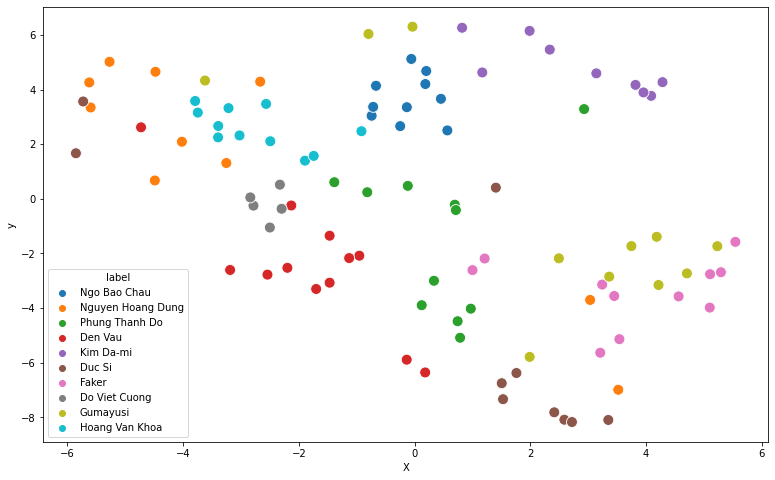

In [107]:

from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(learning_rate=100)

tsne_features = tsne.fit_transform(trainX_fine_tuned)

X = tsne_features[:,0]
y = tsne_features[:,1]

dataset = pd.DataFrame(data=y_train, columns=['label'])
dataset['X'] = X
dataset['y'] = y

plt.figure(figsize=(13,8))
sns.scatterplot(data=dataset, x='X', y='y', hue='label', s=120)

In [108]:
svc_model_finetuned = SVC(kernel='linear', probability=True)
svc_model_finetuned.fit(trainX_fine_tuned, y_train_labels)

SVC(kernel='linear', probability=True)

In [110]:
def predict_multi_face_fine_tuned(image_array, model, clf_model):
    detector = MTCNN()
    detections = detector.detect_faces(image_array)
    extracted_list = extract_multi_face(image_array)
    probability_list = []
    predicted_labels = list()
    for face in extracted_list:
        embedded = get_embedding(model, face)
        y_pred = clf_model.predict(embedded.reshape(1,-1))
        y_prob = clf_model.predict_proba(embedded.reshape(1, -1))
        arg_max = np.argmax(y_prob)
        probability_list.append(np.max(y_prob))
        class_pred = encoder.inverse_transform(y_pred)
        predicted_labels.append(class_pred)
        print(y_prob)
        print(y_pred)
        print(arg_max)
        print(label.inverse_transform(y_pred))
    
    
    image_array_copy = image_array.copy()
    
    for i, face in enumerate(detections):
        x, y, width, height = face['box']
        cv2.rectangle(image_array_copy, (x, y), (x + width, y + height), (0, 255, 0), 2)
        predicted_class = predicted_labels[i][0]
        if (probability_list[i] * 100) < 40:
            predicted_class = 'Unknown'
        cv2.putText(image_array_copy, predicted_class, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.putText(image_array_copy, f'{predicted_class} -{probability_list[i] * 100: .2f}%', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    plt.figure(figsize = (20, 20))
    plt.axis('off')
    plt.imshow(image_array_copy)

In [111]:
url = 'https://cdn.tuoitre.vn/471584752817336320/2024/9/4/kim-da-mi1-our-beloved-summer-1725462272165208322197.jpg'
response = requests.get(url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for MTCNN

[[0.01527443 0.0097681  0.07166135 0.00582135 0.03879605 0.02450895
  0.68724012 0.02239698 0.05001731 0.07451536]]
[6]
6
['Kim Da-mi']


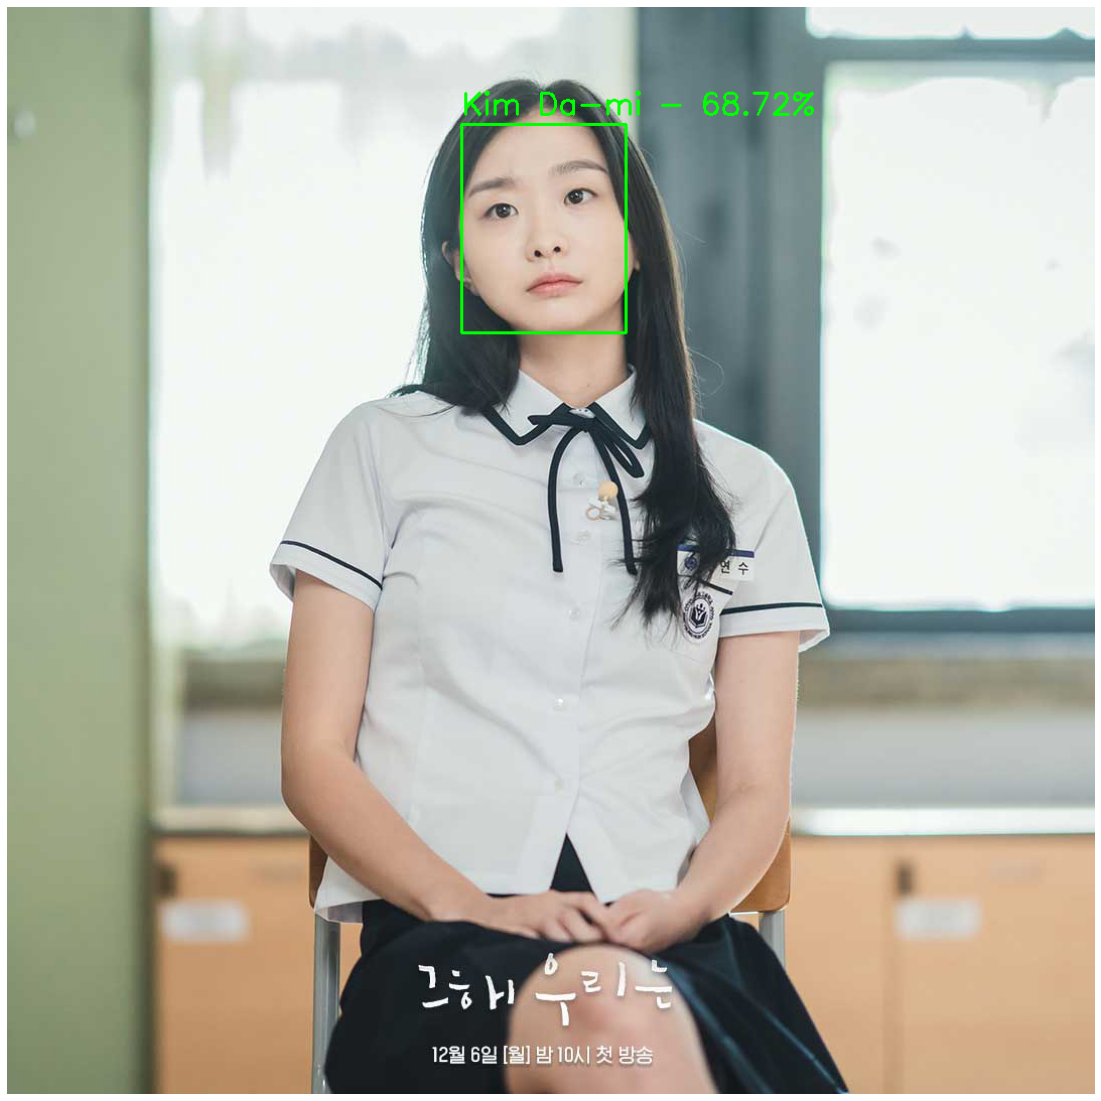

In [112]:
predict_multi_face_fine_tuned(image_rgb, model, svc_model_finetuned)

In [113]:
path = '/kaggle/input/data-test/data/val/Đức Sĩ/z5480893519073_2ad2a434f6d10cf05930ac9ac069f474.jpg'  
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

[[0.11134276 0.03132316 0.66764056 0.01169536 0.02875436 0.01119847
  0.01077725 0.00420154 0.06106174 0.06200481]]
[2]
2
['Duc Si']


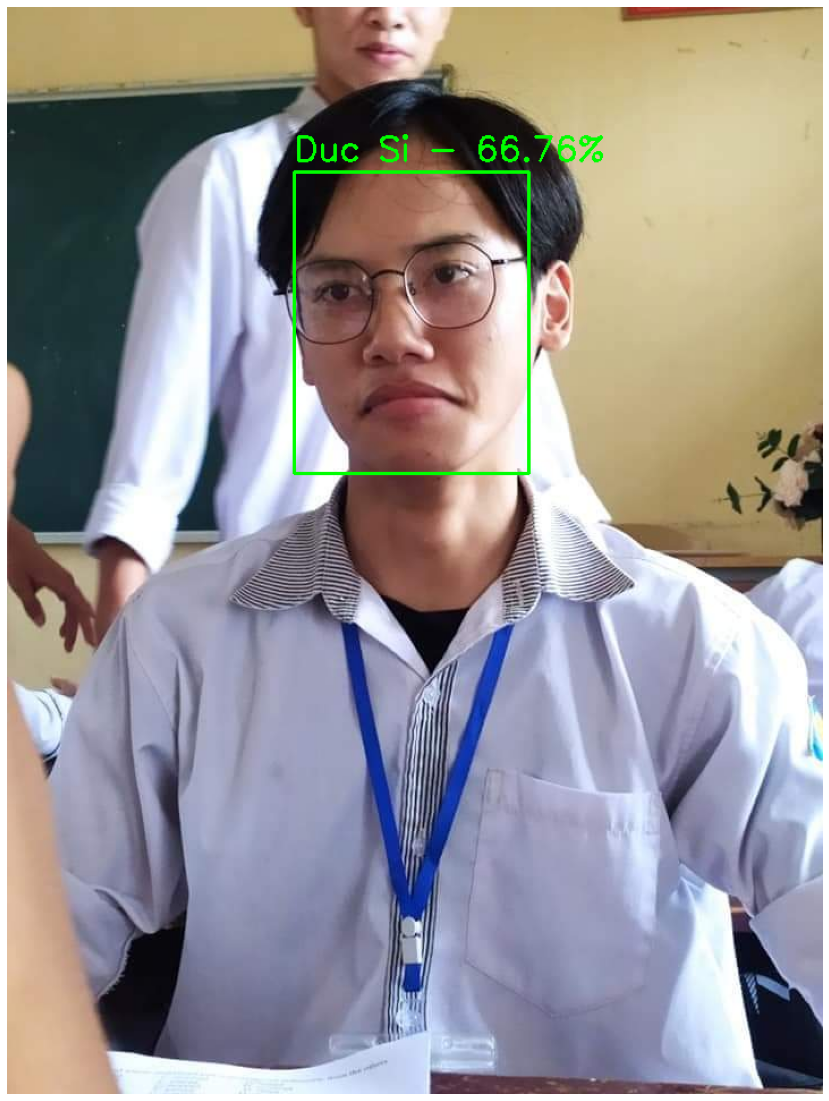

In [114]:
predict_multi_face_fine_tuned(image, model, svc_model_finetuned)